# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction. A brief description of the attributes is given here below: 
    
<br> Preg: Number of times pregnant
<br> Plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
<br> Pres: Diastolic blood pressure (mm Hg)
<br> skin: Triceps skin fold thickness (mm)
<br> test: 2-Hour serum insulin (mu U/ml)
<br> mass: Body mass index (weight in kg/(height in m)^2)
<br> pedi: Diabetes pedigree function
<br> age: Age (years)
<br> class: Class variable (0 or 1)

</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [2]:
dataframe = pd.read_csv("pima-indians-diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file.

# Q2. Print 10 samples from the dataset

In [3]:
dataframe.head(10)
pima_df=dataframe

# Q3 Print the datatypes of each column and the shape of the dataset 

In [22]:
print(dataframe.dtypes)
print(dataframe.shape)

Preg       int64
Plas       int64
Pres       int64
skin       int64
test     float64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
(768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [5]:
pima_df[["Plas","Pres","test","mass"]] = dataframe[["Plas","Pres","test","mass"]].replace(0,dataframe.median())
dataframe.describe()
pima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,15.952218,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q5 Print the descriptive statistics of each & every column using describe() function

In [6]:
pima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,15.952218,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

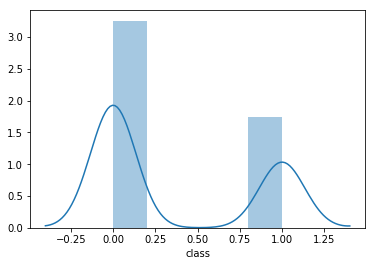

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.distplot(dataframe["class"])
plt.show()

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

C:\Users\shivak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\shivak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


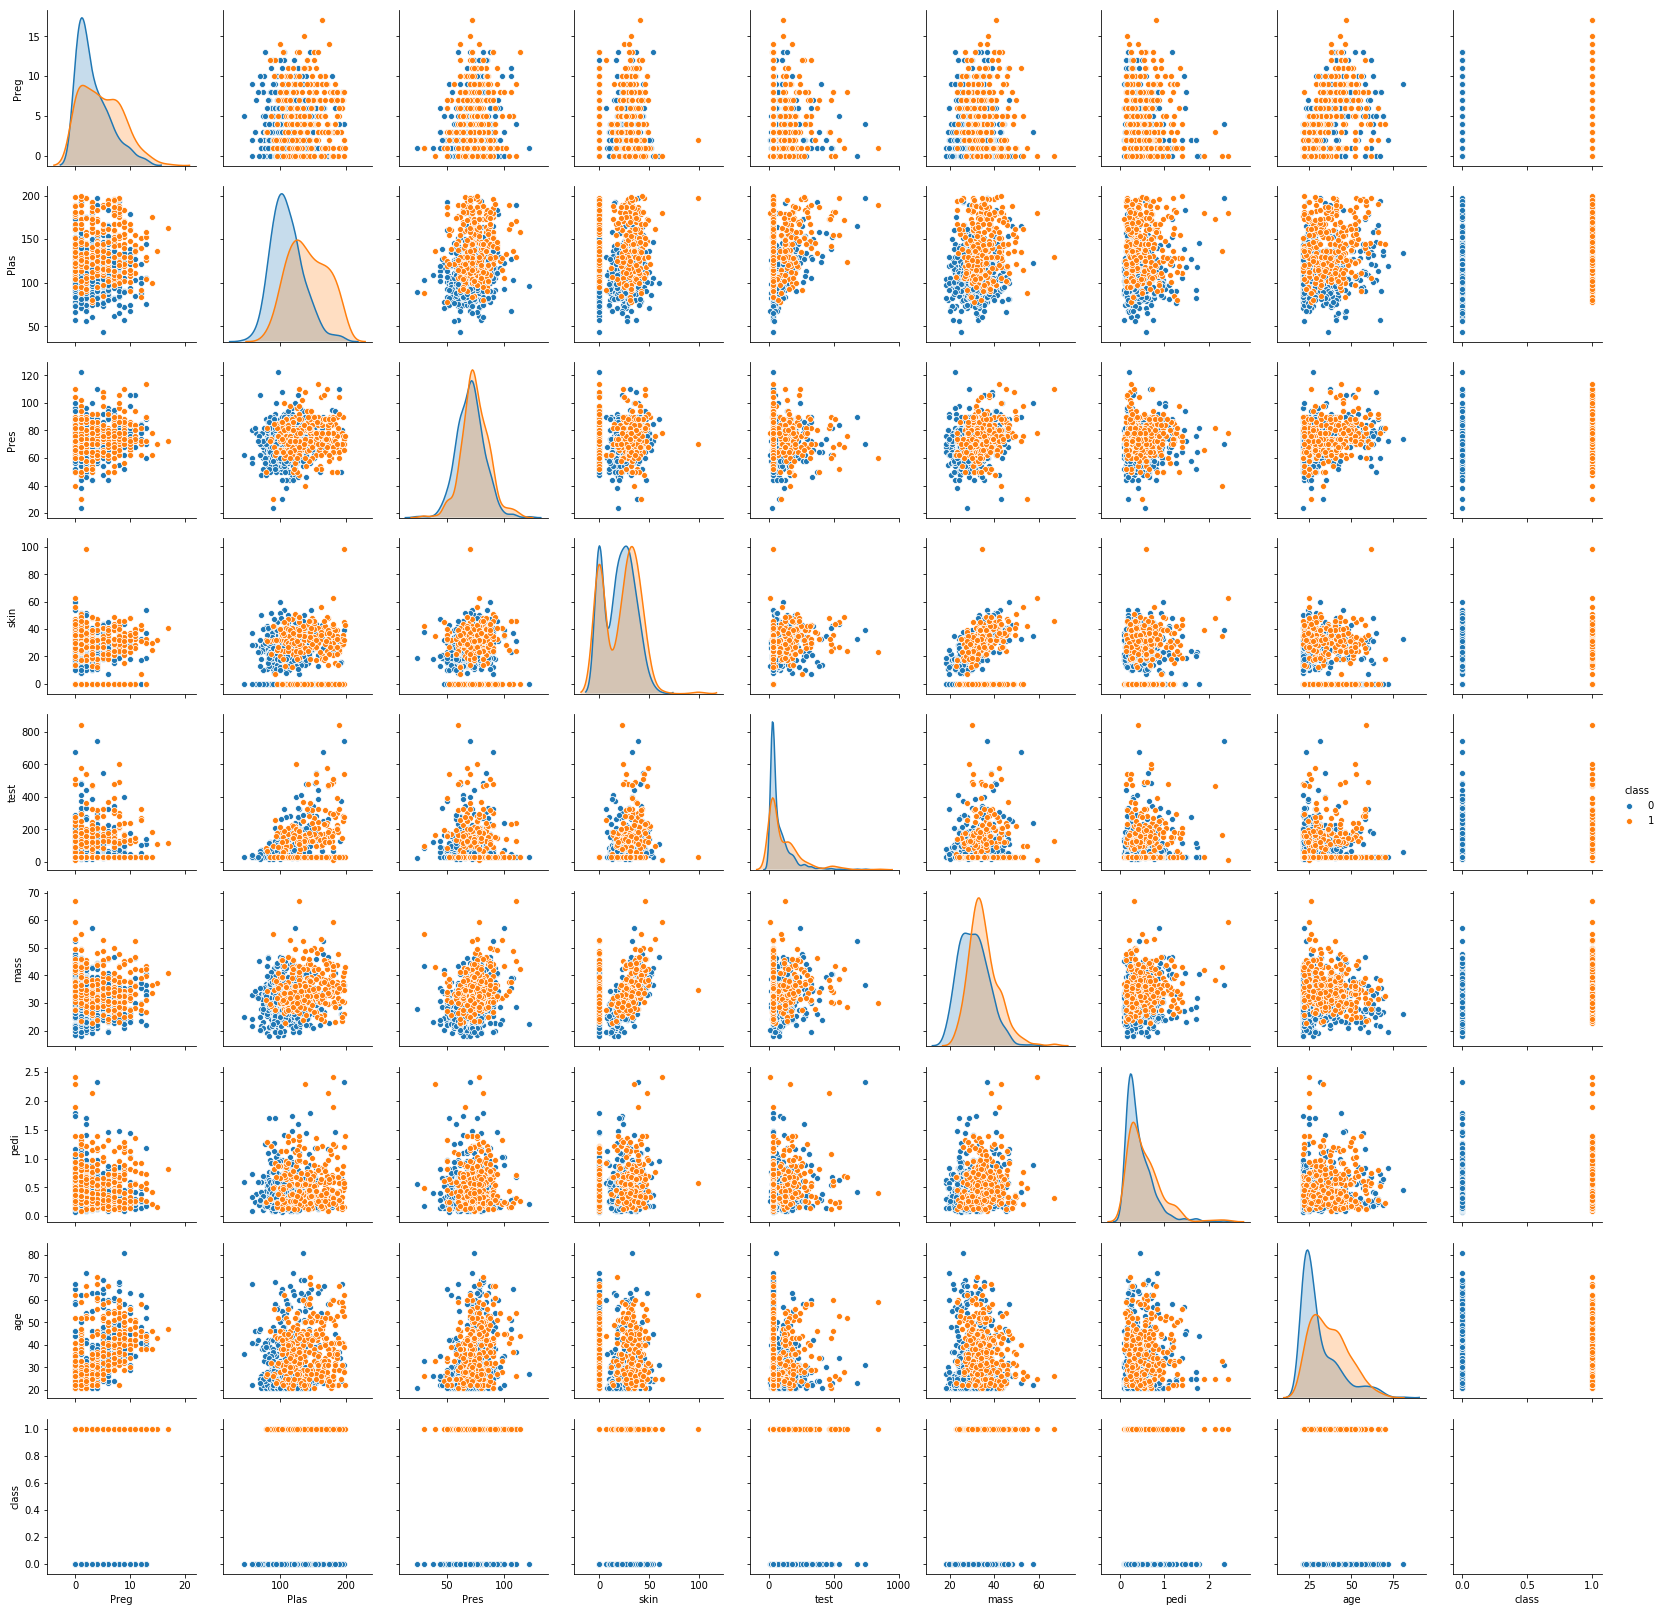

In [8]:
sns.pairplot(pima_df,hue="class")
#The variables mass and skin are positively correlated.
# The target class does not have any significant feature to classify into diabetic or non diabetic as seen in the plots between 
#class and rest of the variables.

In [9]:
pima_df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,-0.081672,-0.055697,0.021546,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.074455,0.357573,0.231400,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.007937,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,-0.081672,0.074455,0.007937,1.000000,0.397161,0.381740,0.183928,-0.113970,0.074752
test,-0.055697,0.357573,-0.028721,0.397161,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.231400,0.281132,0.381740,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.183928,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,-0.113970,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.074752,0.148457,0.312249,0.173844,0.238356,1.000000


# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [10]:
from sklearn.model_selection import train_test_split
array = pima_df.values
X = array[:,0:8] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [11]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [16]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(dt_model.score(X_test , y_test))
print(dt_model.score(X_train,y_train))
# first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

0.908695652173913
0.9219330855018587
[[141  10]
 [ 11  68]]


Print the feature importance of the decision model - Optional

In [18]:
X_train = pima_df.head(538)
X_test = pima_df.tail(230)

y_train = X_train.pop("class")
y_test = X_test.pop("class")

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

           Imp
Preg  0.054116
Plas  0.288129
Pres  0.079287
skin  0.098966
test  0.041119
mass  0.191627
pedi  0.129086
age   0.117669
